# Fine Grain Classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [4]:
path = untar_data(URLs.PETS); path
path.ls()

[PosixPath('/home/shivansh/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/shivansh/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
path_ano = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/home/shivansh/.fastai/data/oxford-iiit-pet/images/boxer_19.jpg'),
 PosixPath('/home/shivansh/.fastai/data/oxford-iiit-pet/images/beagle_96.jpg'),
 PosixPath('/home/shivansh/.fastai/data/oxford-iiit-pet/images/japanese_chin_189.jpg')]

In [7]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [8]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=64)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (3560 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
boxer,beagle,japanese_chin,german_shorthaired,Maine_Coon
Path: /home/shivansh/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (890 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Bengal,keeshond,japanese_chin,Egyptian_Mau,Egyptian_Mau
Path: /home/shivansh/.fastai/data/oxford-iiit-pet/images;

Test: None

23

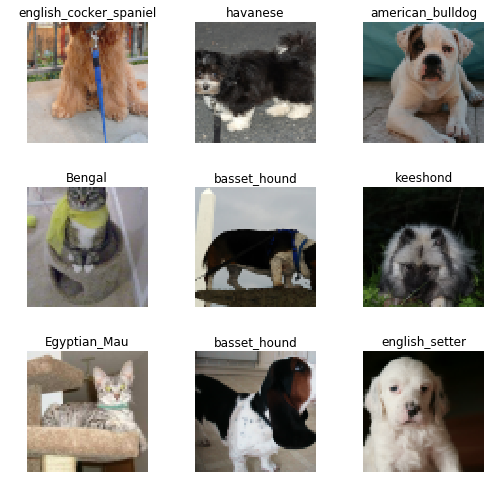

In [9]:
data.show_batch(rows = 3, figsize=(7,7))
data.c

In [10]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [11]:
 learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.117038,2.281390,0.680899,01:54
1,2.440870,1.880757,0.565169,01:51
2,2.074924,1.764112,0.525843,02:28
3,1.841624,1.749501,0.531461,02:16


In [12]:
learn.save('stage-1')

### Interpretetion

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

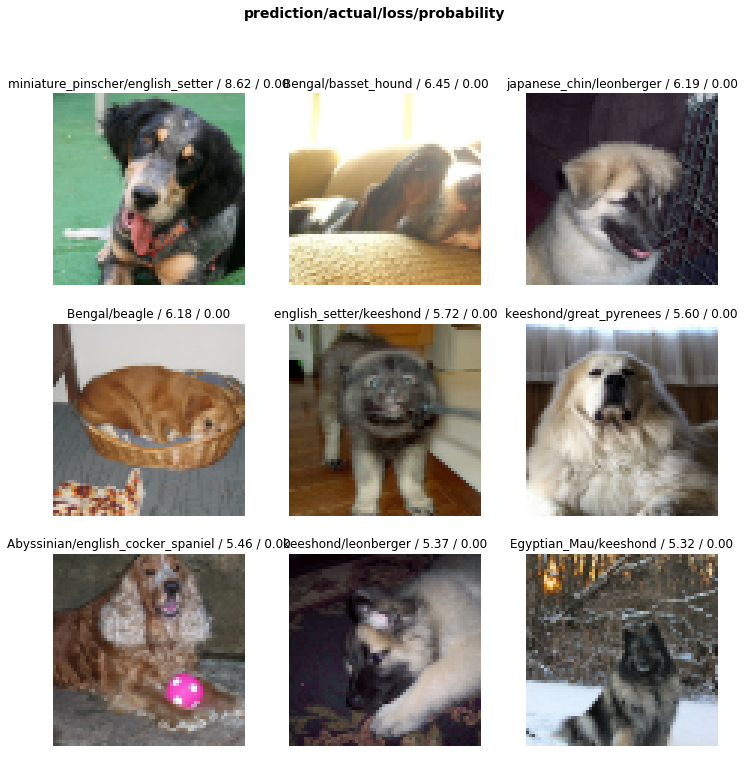

In [19]:
interp.plot_top_losses(9)

In [21]:
doc(interp.plot_top_losses)

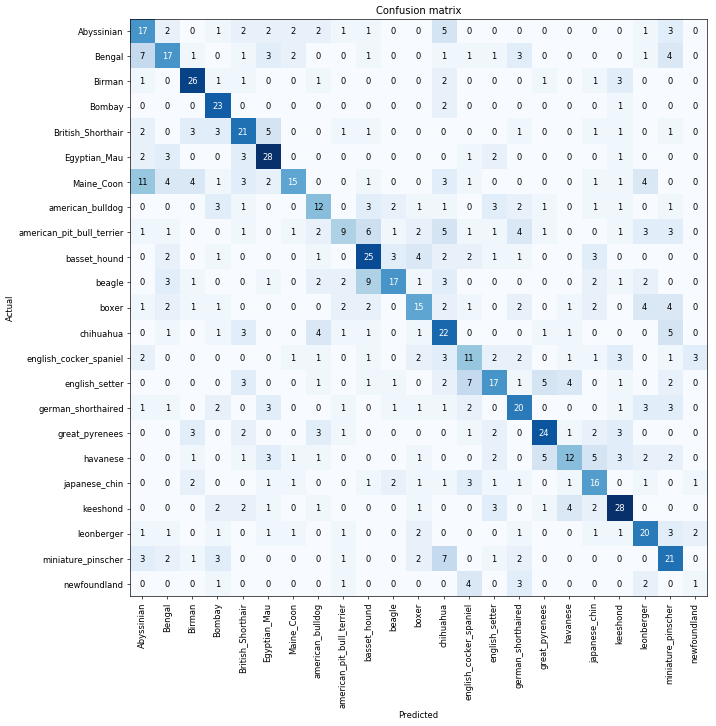

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi = 60)

In [23]:
interp.most_confused(min_val=3)

[('Maine_Coon', 'Abyssinian', 11),
 ('beagle', 'basset_hound', 9),
 ('Bengal', 'Abyssinian', 7),
 ('english_setter', 'english_cocker_spaniel', 7),
 ('miniature_pinscher', 'chihuahua', 7),
 ('american_pit_bull_terrier', 'basset_hound', 6),
 ('Abyssinian', 'chihuahua', 5),
 ('British_Shorthair', 'Egyptian_Mau', 5),
 ('american_pit_bull_terrier', 'chihuahua', 5),
 ('chihuahua', 'miniature_pinscher', 5),
 ('english_setter', 'great_pyrenees', 5),
 ('havanese', 'great_pyrenees', 5),
 ('havanese', 'japanese_chin', 5),
 ('Bengal', 'miniature_pinscher', 4),
 ('Maine_Coon', 'Bengal', 4),
 ('Maine_Coon', 'Birman', 4),
 ('Maine_Coon', 'leonberger', 4),
 ('american_pit_bull_terrier', 'german_shorthaired', 4),
 ('basset_hound', 'boxer', 4),
 ('boxer', 'leonberger', 4),
 ('boxer', 'miniature_pinscher', 4),
 ('chihuahua', 'american_bulldog', 4),
 ('english_setter', 'havanese', 4),
 ('keeshond', 'havanese', 4),
 ('newfoundland', 'english_cocker_spaniel', 4),
 ('Abyssinian', 'miniature_pinscher', 3),
 (

In [24]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.587195,1.384076,0.420225,02:33


In [26]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (3560 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
boxer,beagle,japanese_chin,german_shorthaired,Maine_Coon
Path: /home/shivansh/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (890 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Bengal,keeshond,japanese_chin,Egyptian_Mau,Egyptian_Mau
Path: /home/shivansh/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), 